In [1]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
import numpy as np
import pickle
import random
from numpy.random import seed
import time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import pandas as pd
from secrets import randbelow

In [2]:
pickle_in = open("Xtrain96.pickle","rb")
Xtrain = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain = pickle.load(pickle_in)

Xtrain=np.array(Xtrain/255.0)
ytrain=np.array(ytrain)

pickle_in = open("Xval96.pickle","rb")
Xval = pickle.load(pickle_in)

pickle_in = open("yval96.pickle","rb")
yval = pickle.load(pickle_in)

pickle_in = open("XTest96.pickle","rb")
Xtest = pickle.load(pickle_in)

pickle_in = open("ytest96.pickle","rb")
ytest = pickle.load(pickle_in)

pickle_in = open("Xtrain96.pickle","rb")
Xtrain2 = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain2 = pickle.load(pickle_in)

# Genetic Algorithm

In [3]:
class GA():
    def __init__(self,popsize, iter_):
        self.popsize = popsize
        self.iter_ = iter_
        
    def popinit(self):
        population = [] 
        random.seed(99)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(self.popsize):
            inPop = [random.choice(fmap),random.choice(kernel),random.choice(learningRate),random.choice(dropout),random.choice(layer),random.choice(pool),random.choice(node)]
            population.append(inPop)
        return population

        
    def fitness(self,population,X,y):
        savefit=[]
        for i in range(len(population)):
            pop = population[i]
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(99)
            tf.random.set_seed(99)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

        return savefit
    
    def fitmutation(self,mut,X,y):
            pop = mut
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(99)
            tf.random.set_seed(99)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse
            return fitmut
        
    
    def parent_select(self,population, fitness):
        sumfit = np.sum(fitness)
        prob=[]
        parent_1=[]
        random.seed(99)
        for i in range(len(fitness)):
            tmp = fitness[i]/sumfit
            prob.append(tmp)
        prob_range = []
        sum_ = 0
        for i in range(len(prob)):
                sum_ += prob[i]
                prob_range.append(sum_)
        for i in range(len(prob)):
                rand = random.random()
                if rand <= prob_range[i]:
                    parent_1 = population[i]
                    break
        # select second parent
        parent_2 = parent_1
        while (parent_2 == parent_1):
                for i in range(len(prob)):
                    rand = random.random()
                    if rand <= prob_range[i]:
                        parent_2 = population[i]
                        break
        return parent_1, parent_2
    
    def cross_over(self,parent1, parent2):
        random.seed(99)
        crosspoint = random.randrange(0,6)
        child1 = parent1[:crosspoint+1] + parent2[crosspoint+1:]
        child2 = parent2[:crosspoint+1] + parent1[crosspoint+1:] 
        return child1, child2
    
    def mutation(self,child1, child2):
        import copy
        random.seed(99)
        tmp1 = copy.deepcopy(child1)
        tmp2 = copy.deepcopy(child2)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(len(tmp1)):    
            if (i == 0) :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(fmap)
                    tmp2[point] = random.choice(fmap)
            elif (i ==1):
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(kernel)
                    tmp2[point] = random.choice(kernel)
            elif (i == 2) :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(learningRate)
                    tmp2[point] = random.choice(learningRate)
            elif (i == 3) :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(dropout)
                    tmp2[point] = random.choice(dropout)
            elif (i == 4) :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(layer)
                    tmp2[point] = random.choice(layer)
            elif (i == 5) :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(pool)
                    tmp2[point] = random.choice(pool)
            else :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(node)
                    tmp2[point] = random.choice(node)
        return tmp1, tmp2
       
    def sort(self, population, fitness):
        tmp_dict = {'population' : population,'fitness': fitness }
        df = pd.DataFrame(tmp_dict)
        df.sort_values('fitness', ascending=True, inplace=True)
        new_pop = df['population'].values.tolist()
        fit = df['fitness'].values.tolist()
        return new_pop, fit
    
    def newfit(self,mut1,mut2,listindividu,X,y) :
        tmpmut=[]
        tmpfit1=0.0
        tmpfit2=0.0
        tmpmut.append(mut1)
        tmpmut.append(mut2)
        for i in listindividu:
            if i[0] == mut1 :
                tmpfit1  = (i[1])
            if i[0] == mut2 :
                tmpfit2 = (i[1])
        if (tmpfit1)==0.0 and (tmpfit2)==0.0 :
            fitness = self.fitness(tmpmut,X,y)
            fit1 = fitness[0]
            fit2 = fitness[1]
        elif (tmpfit1)==0.0 :
            fit1 = self.fitmutation(mut1,X,y)
            fit2 = tmpfit2
        else :
            fit1= tmpfit1
            fit2 = self.fitmutation(mut2,X,y)
        return fit1,fit2
                        
    
    def fit(self,X,y):
        pop = self.popinit()
        fitness = self.fitness(pop,X,y)
        listindividu =[]
        for i in range(len(pop)):
            a = pop[i]
            b = fitness[i]
            temp=[a,b]
            listindividu.append(temp)
        print(pop)
        print(fitness)
        bestingen =[]
        index = np.argmin(fitness)
        popgen = pop[index]
        fitgen = fitness[index]
        bestingen.append('Generasi 0')
        bestingen.append(popgen)
        bestingen.append(fitgen)
        for i in range(self.iter_):
            print( 'Generasi Ke ' , i+1 )
            parent_1, parent_2 = self.parent_select(pop, fitness)
            print('Parent 1 dan 2 ', parent_1, parent_2)
            child_1, child_2 = self.cross_over(parent_1, parent_2)
            print('Child 1 dan 2', child_1, child_2 )
            mut1, mut2 = self.mutation(child_1, child_2)
            print('Mutasi 1 dan 2', mut1, mut2)
            pop, fitness = self.sort(pop,fitness)
            fitmut1,fitmut2 = self.newfit(mut1,mut2,listindividu,X,y)
            pop[-1] = mut1; pop[-2] = mut2
            fitness[-1] = fitmut1 ; fitness[-2] = fitmut2
            mutt=[]
            mutt.append(mut1)
            mutt.append(mut2)
            fitmut=[]
            fitmut.append(fitmut1)
            fitmut.append(fitmut2)
            update=[]
            for i in range(len(mutt)) :
                a = mutt[i]
                b = fitmut[i]
                temp=[a,b]
                update.append(temp)
            listindividu.extend(update)
            print(pop)
            print(fitness)
            index = np.argmin(fitness)
            popgen = pop[index]
            fitgen = fitness[index]
            bestingen.append(popgen)
            bestingen.append(fitgen)
        idx_ = np.argmin(fitness)
        best_pop = pop[idx_]
        return  best_pop,bestingen

In [4]:
featSelection = GA( popsize=10, iter_=20)

In [5]:
feat,besteverygen = featSelection.fit(Xtrain,ytrain)

Epoch 1/10
66/66 [==============================] - 285s 87ms/step - loss: 0.8433 - accuracy: 0.5180 - val_loss: 0.6920 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6893 - accuracy: 0.5232 - val_loss: 0.6336 - val_accuracy: 0.6510
Epoch 3/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6375 - accuracy: 0.7032 - val_loss: 0.5895 - val_accuracy: 0.6980
Epoch 4/10
66/66 [==============================] - 3s 47ms/step - loss: 0.5766 - accuracy: 0.7017 - val_loss: 0.5284 - val_accuracy: 0.7718
Epoch 5/10
66/66 [==============================] - 3s 47ms/step - loss: 0.5314 - accuracy: 0.7421 - val_loss: 0.5243 - val_accuracy: 0.7629
Epoch 6/10
66/66 [==============================] - 3s 47ms/step - loss: 0.5162 - accuracy: 0.7470 - val_loss: 0.5118 - val_accuracy: 0.7494
Epoch 7/10
66/66 [==============================] - 3s 47ms/step - loss: 0.4915 - accuracy: 0.7560 - val_loss: 0.5738 - val_accuracy: 0.7047
Epoch 8/10


D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 5s 41ms/step - loss: 0.6936 - accuracy: 0.5234 - val_loss: 0.6913 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6958 - accuracy: 0.4826 - val_loss: 0.6926 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.4858 - val_loss: 0.6944 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.5504 - val_loss: 0.6761 - val_accuracy: 0.5280
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6702 - accuracy: 0.6023 - val_loss: 0.6424 - val_accuracy: 0.6331
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6098 - accuracy: 0.6993 - val_loss: 0.5725 - val_accuracy: 0.7092
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5302 - accuracy: 0.7420 - val_loss: 0.4694 - val_accuracy: 0.7673
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 5s 46ms/step - loss: 0.6999 - accuracy: 0.4777 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.4729 - val_loss: 0.6847 - val_accuracy: 0.6376
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6699 - accuracy: 0.5827 - val_loss: 0.6490 - val_accuracy: 0.5951
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5880 - accuracy: 0.7010 - val_loss: 0.5308 - val_accuracy: 0.7427
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6040 - accuracy: 0.6971 - val_loss: 0.5734 - val_accuracy: 0.7293
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5195 - accuracy: 0.7816 - val_loss: 0.5226 - val_accuracy: 0.7517
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4834 - accuracy: 0.7661 - val_loss: 0.4807 - val_accuracy: 0.7696
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 9s 89ms/step - loss: 0.6967 - accuracy: 0.4701 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6931 - accuracy: 0.5213 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6935 - accuracy: 0.4916 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6933 - accuracy: 0.5114 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6928 - accuracy: 0.5287 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 7s 67ms/step - loss: 0.6935 - accuracy: 0.4951 - val_loss: 0.6927 - val_accuracy: 0.6018
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6926 - accuracy: 0.4827 - val_loss: 0.6405 - val_accuracy: 0.6510
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6430 - accuracy: 0.6374 - val_loss: 0.5675 - val_accuracy: 0.7069
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5999 - accuracy: 0.7001 - val_loss: 0.5234 - val_accuracy: 0.7427
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 0.5252 - accuracy: 0.7511 - val_loss: 0.5407 - val_accuracy: 0.7293
Epoch 6/10
66/66 [==============================] - 1s 20ms/step - loss: 0.4890 - accuracy: 0.7840 - val_loss: 0.4823 - val_accuracy: 0.7562
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4472 - accuracy: 0.7941 - val_loss: 0.4513 - val_accuracy: 0.7942
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 7s 64ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6917 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6917 - accuracy: 0.5320 - val_loss: 0.6822 - val_accuracy: 0.6980
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6764 - accuracy: 0.6000 - val_loss: 0.6015 - val_accuracy: 0.6801
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5708 - accuracy: 0.6990 - val_loss: 0.5112 - val_accuracy: 0.7517
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5359 - accuracy: 0.7450 - val_loss: 0.5138 - val_accuracy: 0.7405
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4648 - accuracy: 0.8143 - val_loss: 0.4548 - val_accuracy: 0.7919
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4459 - accuracy: 0.7956 - val_loss: 0.4372 - val_accuracy: 0.7964
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 33ms/step - loss: 0.6892 - accuracy: 0.5457 - val_loss: 0.6657 - val_accuracy: 0.5727
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6542 - accuracy: 0.6154 - val_loss: 0.6526 - val_accuracy: 0.6264
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5639 - accuracy: 0.7142 - val_loss: 0.5161 - val_accuracy: 0.7315
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4916 - accuracy: 0.7792 - val_loss: 0.4565 - val_accuracy: 0.7987
Epoch 5/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5309 - accuracy: 0.7605 - val_loss: 0.4243 - val_accuracy: 0.8277
Epoch 6/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4379 - accuracy: 0.8109 - val_loss: 0.4607 - val_accuracy: 0.7718
Epoch 7/10
66/66 [==============================] - 0s 5ms/step - loss: 0.3794 - accuracy: 0.8176 - val_loss: 0.4793 - val_accuracy: 0.8009
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6857 - accuracy: 0.5610 - val_loss: 0.6364 - val_accuracy: 0.7271
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6350 - accuracy: 0.6648 - val_loss: 0.5702 - val_accuracy: 0.7338
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5787 - accuracy: 0.6639 - val_loss: 0.5618 - val_accuracy: 0.6734
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5160 - accuracy: 0.7409 - val_loss: 0.5016 - val_accuracy: 0.7606
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4868 - accuracy: 0.7698 - val_loss: 0.4708 - val_accuracy: 0.7875
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4852 - accuracy: 0.7758 - val_loss: 0.4334 - val_accuracy: 0.8166
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4322 - accuracy: 0.7951 - val_loss: 0.4036 - val_accuracy: 0.8546
Epoch 8/10
66/66 [==

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 36ms/step - loss: 0.6890 - accuracy: 0.5397 - val_loss: 0.6462 - val_accuracy: 0.7315
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6345 - accuracy: 0.6597 - val_loss: 0.5577 - val_accuracy: 0.7315
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5499 - accuracy: 0.7390 - val_loss: 0.4994 - val_accuracy: 0.7629
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4765 - accuracy: 0.7798 - val_loss: 0.4485 - val_accuracy: 0.8031
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4381 - accuracy: 0.8037 - val_loss: 0.4111 - val_accuracy: 0.8121
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4177 - accuracy: 0.8323 - val_loss: 0.3893 - val_accuracy: 0.8456
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.3681 - accuracy: 0.8385 - val_loss: 0.3370 - val_accuracy: 0.8837
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 36ms/step - loss: 12.5955 - accuracy: 0.5109 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6948 - accuracy: 0.4724 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6936 - accuracy: 0.4535 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6936 - accuracy: 0.5114 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.4826 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6928 - accuracy: 0.5287 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 8/10
6

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 19ms/step - loss: 0.6933 - accuracy: 0.5156 - val_loss: 0.6927 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.4974 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6939 - accuracy: 0.4737 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.5116 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6926 - accuracy: 0.5151 - val_loss: 0.6880 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6766 - accuracy: 0.5761 - val_loss: 0.5498 - val_accuracy: 0.7427
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5454 - accuracy: 0.7558 - val_loss: 0.3630 - val_accuracy: 0.8613
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 22ms/step - loss: 0.6908 - accuracy: 0.5159 - val_loss: 0.6648 - val_accuracy: 0.7047
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6388 - accuracy: 0.6522 - val_loss: 0.5938 - val_accuracy: 0.7226
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5292 - accuracy: 0.7409 - val_loss: 0.4740 - val_accuracy: 0.7808
Epoch 4/10
66/66 [==============================] - 1s 20ms/step - loss: 0.4751 - accuracy: 0.7921 - val_loss: 0.4329 - val_accuracy: 0.8121
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 0.4727 - accuracy: 0.7950 - val_loss: 0.4474 - val_accuracy: 0.7964
Epoch 6/10
66/66 [==============================] - 1s 20ms/step - loss: 0.3892 - accuracy: 0.8580 - val_loss: 0.3880 - val_accuracy: 0.8434
Epoch 7/10
66/66 [==============================] - 1s 20ms/step - loss: 0.3550 - accuracy: 0.8494 - val_loss: 0.2799 - val_accuracy: 0.8971
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.7340 - accuracy: 0.5256 - val_loss: 0.6298 - val_accuracy: 0.7517
Epoch 2/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6042 - accuracy: 0.6744 - val_loss: 0.4994 - val_accuracy: 0.7651
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4723 - accuracy: 0.7857 - val_loss: 0.3780 - val_accuracy: 0.8591
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.3641 - accuracy: 0.8535 - val_loss: 0.3403 - val_accuracy: 0.8725
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.3223 - accuracy: 0.8760 - val_loss: 0.2988 - val_accuracy: 0.8926
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.3035 - accuracy: 0.8820 - val_loss: 0.2856 - val_accuracy: 0.8904
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.2566 - accuracy: 0.8993 - val_loss: 0.3264 - val_accuracy: 0.8680
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 6s 54ms/step - loss: 0.8476 - accuracy: 0.4796 - val_loss: 0.6941 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 15ms/step - loss: 0.6938 - accuracy: 0.4862 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 1s 15ms/step - loss: 0.6939 - accuracy: 0.4605 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6939 - accuracy: 0.5114 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5091 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6929 - accuracy: 0.5287 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 24ms/step - loss: 0.6934 - accuracy: 0.4987 - val_loss: 0.6928 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6935 - accuracy: 0.4901 - val_loss: 0.6903 - val_accuracy: 0.6957
Epoch 3/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6778 - accuracy: 0.5896 - val_loss: 0.5700 - val_accuracy: 0.7092
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5537 - accuracy: 0.7192 - val_loss: 0.5199 - val_accuracy: 0.7539
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5218 - accuracy: 0.7652 - val_loss: 0.5274 - val_accuracy: 0.7584
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4800 - accuracy: 0.7879 - val_loss: 0.4381 - val_accuracy: 0.8210
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4186 - accuracy: 0.8186 - val_loss: 0.4067 - val_accuracy: 0.8210
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.6915 - accuracy: 0.5330 - val_loss: 0.6770 - val_accuracy: 0.5973
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6761 - accuracy: 0.5471 - val_loss: 0.6022 - val_accuracy: 0.7271
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6079 - accuracy: 0.6742 - val_loss: 0.5268 - val_accuracy: 0.7360
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5335 - accuracy: 0.7406 - val_loss: 0.4797 - val_accuracy: 0.7875
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5124 - accuracy: 0.7532 - val_loss: 0.4507 - val_accuracy: 0.8076
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4259 - accuracy: 0.8373 - val_loss: 0.4115 - val_accuracy: 0.8412
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4090 - accuracy: 0.8214 - val_loss: 0.3685 - val_accuracy: 0.8680
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 21ms/step - loss: 0.6937 - accuracy: 0.5041 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6931 - accuracy: 0.5213 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6934 - accuracy: 0.4935 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.5114 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5287 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6916 - accuracy: 0.5422 - val_loss: 0.6730 - val_accuracy: 0.5772
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6646 - accuracy: 0.6175 - val_loss: 0.5807 - val_accuracy: 0.7136
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5882 - accuracy: 0.7021 - val_loss: 0.5111 - val_accuracy: 0.7651
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4999 - accuracy: 0.7609 - val_loss: 0.4685 - val_accuracy: 0.7942
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4461 - accuracy: 0.8246 - val_loss: 0.4083 - val_accuracy: 0.8591
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4153 - accuracy: 0.8438 - val_loss: 0.3689 - val_accuracy: 0.8613
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3603 - accuracy: 0.8427 - val_loss: 0.3155 - val_accuracy: 0.8971
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 26ms/step - loss: 0.6931 - accuracy: 0.4982 - val_loss: 0.6915 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6912 - accuracy: 0.5658 - val_loss: 0.6799 - val_accuracy: 0.5145
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6719 - accuracy: 0.5878 - val_loss: 0.6051 - val_accuracy: 0.6465
Epoch 4/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5728 - accuracy: 0.6904 - val_loss: 0.5336 - val_accuracy: 0.7517
Epoch 5/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5450 - accuracy: 0.7394 - val_loss: 0.5203 - val_accuracy: 0.7472
Epoch 6/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4883 - accuracy: 0.7781 - val_loss: 0.4826 - val_accuracy: 0.7830
Epoch 7/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4798 - accuracy: 0.7633 - val_loss: 0.4740 - val_accuracy: 0.7942
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.6915 - accuracy: 0.5403 - val_loss: 0.6777 - val_accuracy: 0.5861
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6757 - accuracy: 0.5626 - val_loss: 0.6071 - val_accuracy: 0.7271
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6122 - accuracy: 0.6780 - val_loss: 0.5319 - val_accuracy: 0.7383
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5346 - accuracy: 0.7538 - val_loss: 0.4846 - val_accuracy: 0.7897
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5146 - accuracy: 0.7483 - val_loss: 0.4450 - val_accuracy: 0.8143
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4187 - accuracy: 0.8429 - val_loss: 0.4102 - val_accuracy: 0.8501
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4131 - accuracy: 0.8133 - val_loss: 0.3753 - val_accuracy: 0.8479
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.6929 - accuracy: 0.4891 - val_loss: 0.6917 - val_accuracy: 0.5168
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6916 - accuracy: 0.5439 - val_loss: 0.6883 - val_accuracy: 0.6465
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6850 - accuracy: 0.6342 - val_loss: 0.6918 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6694 - accuracy: 0.5884 - val_loss: 0.6386 - val_accuracy: 0.6421
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6202 - accuracy: 0.6818 - val_loss: 0.5930 - val_accuracy: 0.6890
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5608 - accuracy: 0.7525 - val_loss: 0.6031 - val_accuracy: 0.6801
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5576 - accuracy: 0.7271 - val_loss: 0.5601 - val_accuracy: 0.7204
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6863 - accuracy: 0.5465 - val_loss: 0.6427 - val_accuracy: 0.6063
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6536 - accuracy: 0.6140 - val_loss: 0.5498 - val_accuracy: 0.7383
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5772 - accuracy: 0.6647 - val_loss: 0.5300 - val_accuracy: 0.7204
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5004 - accuracy: 0.7648 - val_loss: 0.4458 - val_accuracy: 0.8098
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4776 - accuracy: 0.8004 - val_loss: 0.4275 - val_accuracy: 0.8501
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4307 - accuracy: 0.8258 - val_loss: 0.4278 - val_accuracy: 0.8054
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3836 - accuracy: 0.8315 - val_loss: 0.3284 - val_accuracy: 0.8881
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6862 - accuracy: 0.5470 - val_loss: 0.6461 - val_accuracy: 0.5996
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6556 - accuracy: 0.6080 - val_loss: 0.5524 - val_accuracy: 0.7248
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5685 - accuracy: 0.6950 - val_loss: 0.5184 - val_accuracy: 0.7338
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4996 - accuracy: 0.7559 - val_loss: 0.4393 - val_accuracy: 0.8121
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4761 - accuracy: 0.7857 - val_loss: 0.4162 - val_accuracy: 0.8479
Epoch 6/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4170 - accuracy: 0.8234 - val_loss: 0.4266 - val_accuracy: 0.8054
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.3832 - accuracy: 0.8192 - val_loss: 0.3304 - val_accuracy: 0.8725
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6863 - accuracy: 0.5472 - val_loss: 0.6500 - val_accuracy: 0.5906
Epoch 2/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6603 - accuracy: 0.6010 - val_loss: 0.5716 - val_accuracy: 0.6823
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5783 - accuracy: 0.6780 - val_loss: 0.5373 - val_accuracy: 0.7069
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4991 - accuracy: 0.7583 - val_loss: 0.4385 - val_accuracy: 0.8076
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4771 - accuracy: 0.7902 - val_loss: 0.4147 - val_accuracy: 0.8389
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4246 - accuracy: 0.8182 - val_loss: 0.3834 - val_accuracy: 0.8456
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3760 - accuracy: 0.8482 - val_loss: 0.3246 - val_accuracy: 0.8881
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6857 - accuracy: 0.5612 - val_loss: 0.6364 - val_accuracy: 0.7271
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6350 - accuracy: 0.6656 - val_loss: 0.5703 - val_accuracy: 0.7338
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5787 - accuracy: 0.6639 - val_loss: 0.5619 - val_accuracy: 0.6734
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5163 - accuracy: 0.7409 - val_loss: 0.5017 - val_accuracy: 0.7629
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4864 - accuracy: 0.7740 - val_loss: 0.4701 - val_accuracy: 0.7875
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4843 - accuracy: 0.7751 - val_loss: 0.4317 - val_accuracy: 0.8121
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4327 - accuracy: 0.7967 - val_loss: 0.3997 - val_accuracy: 0.8523
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6857 - accuracy: 0.5612 - val_loss: 0.6364 - val_accuracy: 0.7271
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6350 - accuracy: 0.6647 - val_loss: 0.5702 - val_accuracy: 0.7338
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5789 - accuracy: 0.6623 - val_loss: 0.5617 - val_accuracy: 0.6734
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5162 - accuracy: 0.7409 - val_loss: 0.5024 - val_accuracy: 0.7629
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4868 - accuracy: 0.7730 - val_loss: 0.4700 - val_accuracy: 0.7897
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4818 - accuracy: 0.7804 - val_loss: 0.4351 - val_accuracy: 0.8210
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4332 - accuracy: 0.7922 - val_loss: 0.4025 - val_accuracy: 0.8568
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6857 - accuracy: 0.5614 - val_loss: 0.6365 - val_accuracy: 0.7271
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6351 - accuracy: 0.6672 - val_loss: 0.5705 - val_accuracy: 0.7315
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5786 - accuracy: 0.6694 - val_loss: 0.5630 - val_accuracy: 0.6734
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5160 - accuracy: 0.7385 - val_loss: 0.5018 - val_accuracy: 0.7584
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4868 - accuracy: 0.7726 - val_loss: 0.4703 - val_accuracy: 0.7875
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4840 - accuracy: 0.7805 - val_loss: 0.4311 - val_accuracy: 0.8121
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4310 - accuracy: 0.7917 - val_loss: 0.3996 - val_accuracy: 0.8523
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.6857 - accuracy: 0.5599 - val_loss: 0.6366 - val_accuracy: 0.7248
Epoch 2/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6355 - accuracy: 0.6608 - val_loss: 0.5708 - val_accuracy: 0.7315
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5783 - accuracy: 0.6641 - val_loss: 0.5629 - val_accuracy: 0.6711
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5168 - accuracy: 0.7375 - val_loss: 0.5039 - val_accuracy: 0.7651
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4883 - accuracy: 0.7706 - val_loss: 0.4716 - val_accuracy: 0.7897
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4820 - accuracy: 0.7820 - val_loss: 0.4358 - val_accuracy: 0.8076
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4345 - accuracy: 0.7856 - val_loss: 0.4066 - val_accuracy: 0.8456
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 16ms/step - loss: 0.6913 - accuracy: 0.5199 - val_loss: 0.6883 - val_accuracy: 0.5951
Epoch 2/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6890 - accuracy: 0.5231 - val_loss: 0.6825 - val_accuracy: 0.6555
Epoch 3/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6806 - accuracy: 0.6269 - val_loss: 0.6888 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6696 - accuracy: 0.5820 - val_loss: 0.6484 - val_accuracy: 0.6532
Epoch 5/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6380 - accuracy: 0.6535 - val_loss: 0.6109 - val_accuracy: 0.6734
Epoch 6/10
66/66 [==============================] - 1s 14ms/step - loss: 0.5953 - accuracy: 0.7057 - val_loss: 0.6174 - val_accuracy: 0.6689
Epoch 7/10
66/66 [==============================] - 1s 14ms/step - loss: 0.5898 - accuracy: 0.7043 - val_loss: 0.5737 - val_accuracy: 0.7025
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6862 - accuracy: 0.5496 - val_loss: 0.6430 - val_accuracy: 0.6040
Epoch 2/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6568 - accuracy: 0.6098 - val_loss: 0.5503 - val_accuracy: 0.7293
Epoch 3/10
66/66 [==============================] - 1s 12ms/step - loss: 0.5732 - accuracy: 0.6694 - val_loss: 0.5347 - val_accuracy: 0.7114
Epoch 4/10
66/66 [==============================] - 1s 12ms/step - loss: 0.5008 - accuracy: 0.7535 - val_loss: 0.4490 - val_accuracy: 0.8076
Epoch 5/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4990 - accuracy: 0.7719 - val_loss: 0.4244 - val_accuracy: 0.8501
Epoch 6/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4189 - accuracy: 0.8262 - val_loss: 0.4161 - val_accuracy: 0.8143
Epoch 7/10
66/66 [==============================] - 1s 12ms/step - loss: 0.3946 - accuracy: 0.8195 - val_loss: 0.3386 - val_accuracy: 0.8859
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 10ms/step - loss: 0.6961 - accuracy: 0.5251 - val_loss: 0.6289 - val_accuracy: 0.6600
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6241 - accuracy: 0.6551 - val_loss: 0.5476 - val_accuracy: 0.7002
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5565 - accuracy: 0.7195 - val_loss: 0.5258 - val_accuracy: 0.7159
Epoch 4/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4988 - accuracy: 0.7593 - val_loss: 0.4963 - val_accuracy: 0.7584
Epoch 5/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5157 - accuracy: 0.7633 - val_loss: 0.4349 - val_accuracy: 0.8009
Epoch 6/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4361 - accuracy: 0.7857 - val_loss: 0.5670 - val_accuracy: 0.7002
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.3725 - accuracy: 0.8386 - val_loss: 0.4865 - val_accuracy: 0.7315
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 15ms/step - loss: 0.6878 - accuracy: 0.5660 - val_loss: 0.6636 - val_accuracy: 0.6174
Epoch 2/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6611 - accuracy: 0.6069 - val_loss: 0.6058 - val_accuracy: 0.6577
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6005 - accuracy: 0.6601 - val_loss: 0.5760 - val_accuracy: 0.6577
Epoch 4/10
66/66 [==============================] - 1s 12ms/step - loss: 0.5426 - accuracy: 0.7187 - val_loss: 0.5350 - val_accuracy: 0.7405
Epoch 5/10
66/66 [==============================] - 1s 12ms/step - loss: 0.5270 - accuracy: 0.7433 - val_loss: 0.5194 - val_accuracy: 0.7517
Epoch 6/10
66/66 [==============================] - 1s 12ms/step - loss: 0.5058 - accuracy: 0.7581 - val_loss: 0.5070 - val_accuracy: 0.7718
Epoch 7/10
66/66 [==============================] - 1s 12ms/step - loss: 0.5011 - accuracy: 0.7462 - val_loss: 0.4856 - val_accuracy: 0.7539
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 11ms/step - loss: 0.6873 - accuracy: 0.5658 - val_loss: 0.6345 - val_accuracy: 0.6957
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6482 - accuracy: 0.6340 - val_loss: 0.5833 - val_accuracy: 0.6577
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5808 - accuracy: 0.6853 - val_loss: 0.5720 - val_accuracy: 0.6801
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5190 - accuracy: 0.7440 - val_loss: 0.4896 - val_accuracy: 0.7696
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4871 - accuracy: 0.7837 - val_loss: 0.4583 - val_accuracy: 0.8009
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4765 - accuracy: 0.7963 - val_loss: 0.4323 - val_accuracy: 0.8076
Epoch 7/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4227 - accuracy: 0.8079 - val_loss: 0.3963 - val_accuracy: 0.8747
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 20ms/step - loss: 0.6913 - accuracy: 0.5192 - val_loss: 0.6884 - val_accuracy: 0.6174
Epoch 2/10
66/66 [==============================] - 1s 16ms/step - loss: 0.6892 - accuracy: 0.5173 - val_loss: 0.6823 - val_accuracy: 0.6421
Epoch 3/10
66/66 [==============================] - 1s 15ms/step - loss: 0.6810 - accuracy: 0.6252 - val_loss: 0.6886 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 15ms/step - loss: 0.6714 - accuracy: 0.5800 - val_loss: 0.6503 - val_accuracy: 0.6600
Epoch 5/10
66/66 [==============================] - 1s 16ms/step - loss: 0.6399 - accuracy: 0.6647 - val_loss: 0.6146 - val_accuracy: 0.6644
Epoch 6/10
66/66 [==============================] - 1s 15ms/step - loss: 0.5998 - accuracy: 0.7043 - val_loss: 0.6189 - val_accuracy: 0.6689
Epoch 7/10
66/66 [==============================] - 1s 15ms/step - loss: 0.5944 - accuracy: 0.6941 - val_loss: 0.5769 - val_accuracy: 0.6980
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 4s 33ms/step - loss: 0.6896 - accuracy: 0.5229 - val_loss: 0.6618 - val_accuracy: 0.6085
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6666 - accuracy: 0.5996 - val_loss: 0.6161 - val_accuracy: 0.6913
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5708 - accuracy: 0.7170 - val_loss: 0.4988 - val_accuracy: 0.7629
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5001 - accuracy: 0.7663 - val_loss: 0.4490 - val_accuracy: 0.8054
Epoch 5/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4269 - accuracy: 0.8172 - val_loss: 0.4112 - val_accuracy: 0.8523
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3914 - accuracy: 0.8480 - val_loss: 0.6159 - val_accuracy: 0.6890
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3859 - accuracy: 0.8428 - val_loss: 0.3155 - val_accuracy: 0.8837
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 13ms/step - loss: 0.6886 - accuracy: 0.5561 - val_loss: 0.6519 - val_accuracy: 0.6622
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6554 - accuracy: 0.6347 - val_loss: 0.5711 - val_accuracy: 0.7204
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5722 - accuracy: 0.7202 - val_loss: 0.5196 - val_accuracy: 0.7517
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5057 - accuracy: 0.7624 - val_loss: 0.4826 - val_accuracy: 0.7763
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4687 - accuracy: 0.7862 - val_loss: 0.4507 - val_accuracy: 0.8166
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4256 - accuracy: 0.8235 - val_loss: 0.4269 - val_accuracy: 0.8166
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.3988 - accuracy: 0.8095 - val_loss: 0.4081 - val_accuracy: 0.8591
Epoch 8/10
66/66 [======

In [6]:
feat

[32, 5, 0.0005, 0.1, 3, 1, 512]

In [7]:
besteverygen

['Generasi 0',
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.16256376927743507,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.16256376927743507,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.16256376927743507,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.16256376927743507,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.16256376927743507,
 [32, 7, 0.0001, 0.1, 6, 0, 512],
 0.155955913753435,
 [32, 7, 0.0001, 0.1, 6, 0, 512],
 0.155955913753435,
 [32, 7, 0.0001, 0.1, 6, 0, 512],
 0.155955913753435,
 [32, 7, 0.0001, 0.1, 6, 0, 512],
 0.155955913753435,
 [32, 7, 0.0001, 0.1, 6, 0, 512],
 0.155955913753435,
 [32, 7, 0.0001, 0.1, 6, 0, 512],
 0.155955913753435,
 [32, 7, 0.0001, 0.1, 6, 0, 512],
 0.155955913753435,
 [32, 7, 0.0001, 0.1, 6, 0, 512],
 0.155955913753435,
 [32, 7, 0.0001, 0.1, 6, 0, 512],
 0.155955913753435,
 [64, 2, 0.0001, 0.0, 5, 0, 128],
 0.15516690119379029,
 [64, 2, 0.0001, 0.0, 5, 0, 128],
 0.15516690119379029,
 [32, 5, 0.0005, 0.1, 3, 1, 512],
 0.1527328153987194,
 [32, 5, 0.0005, 0.1, 3, 1, 512],
 0.152732815398719

# CNN

In [8]:
            pop = feat
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(99)
            tf.random.set_seed(99)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 = model.fit(Xtrain, ytrain ,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP3V2.model')

            else :
                model.add(Conv2D(f,(k,k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 = model.fit(Xtrain, ytrain,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP3V2.model')

Epoch 1/10
66/66 [==============================] - 283s 41ms/step - loss: 0.6940 - accuracy: 0.5251 - val_loss: 0.6822 - val_accuracy: 0.5257
Epoch 2/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.5944 - val_loss: 0.6571 - val_accuracy: 0.6353
Epoch 3/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5577 - accuracy: 0.7020 - val_loss: 0.5689 - val_accuracy: 0.6734
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4860 - accuracy: 0.7511 - val_loss: 0.4801 - val_accuracy: 0.7763
Epoch 5/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5033 - accuracy: 0.7711 - val_loss: 0.4281 - val_accuracy: 0.8345
Epoch 6/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4055 - accuracy: 0.8445 - val_loss: 0.6055 - val_accuracy: 0.7002
Epoch 7/10
66/66 [==============================] - 0s 5ms/step - loss: 0.3909 - accuracy: 0.8283 - val_loss: 0.2645 - val_accuracy: 0.9306
Epoch 8/10
66/66 

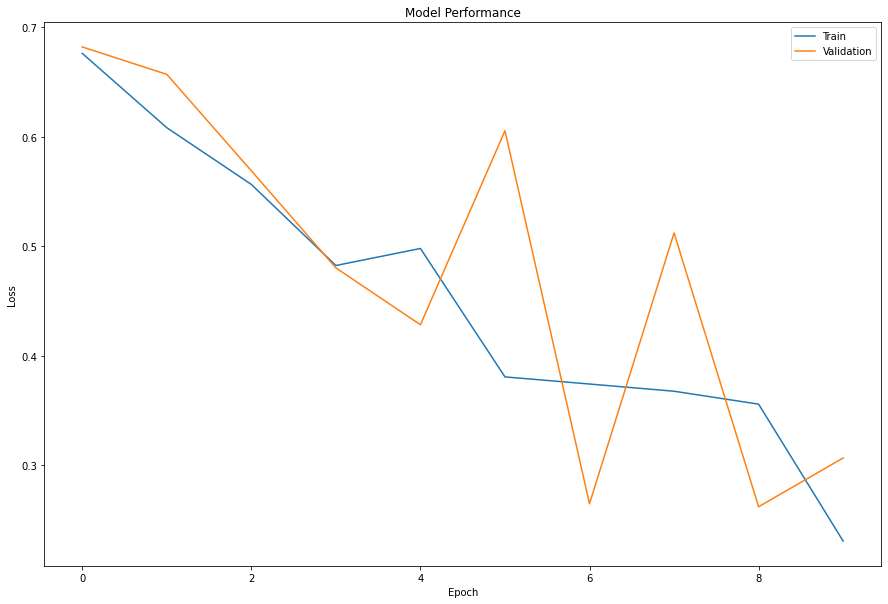

In [9]:
import matplotlib.pyplot as plt
#Loss Visualization for data training and validation

plt.figure(figsize=(15,10))
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

In [10]:
model = tf.keras.models.load_model("CNNP3V2.model")

# Data Latih

In [11]:
prediction = model.predict(Xtrain2)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.7466398

In [12]:
m = tf.keras.metrics.Precision()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.6807229

In [13]:
m = tf.keras.metrics.Recall()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.9199457

In [14]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

59.0

In [15]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

318.0

In [16]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

433.0

In [17]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

678.0

# Data Validasi

In [18]:
prediction = model.predict(Xval)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.80546623

In [19]:
m = tf.keras.metrics.Precision()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.74670184

In [20]:
m = tf.keras.metrics.Recall()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.91883117

In [21]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

25.0

In [22]:
m = tf.keras.metrics.FalsePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

96.0

In [23]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

218.0

In [24]:
m = tf.keras.metrics.TruePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

283.0

# Data Uji

In [25]:
prediction = model.predict(Xtest)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.6846361

In [26]:
m = tf.keras.metrics.Precision()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.6245353

In [27]:
m = tf.keras.metrics.Recall()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.9130435

In [28]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

16.0

In [29]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

101.0

In [30]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

86.0

In [31]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

168.0